In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)
print(y_train_1.shape)
num_input_features = x_train_1.shape[1]

Index(['petal_length', 'petal_width'], dtype='object')
species
(105, 1)


<h2>Define hyper-parameters</h2>

In [6]:
#define number of training iterations
NUM_ITER = 1000
#define learning rate
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')
W = tf.Variable(tf.random_normal([2, 1]),name='W'),
b = tf.Variable(tf.random_normal(shape=[1,1]),name='b')

<h2>Define update rule and accuracy</h2>

In [8]:
def setosa_signle_perceptron(x):
    W_reshaped = tf.reshape(W, [2,1])
    out = tf.sigmoid(tf.add(tf.matmul(x,W_reshaped),b))
    return out
y_predicted = setosa_signle_perceptron(X)
loss = tf.reduce_mean(-1*(Y*tf.log(y_predicted)+(1-Y)*tf.log(1-y_predicted)))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)
correct_pred = tf.equal(tf.round(y_predicted),Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

In [9]:
init = tf.global_variables_initializer()
test_accuracy = []
train_accuracy = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(NUM_ITER):
        #run optimization
        sess.run(optimizer, feed_dict={X:x_train_1.values, Y:y_train_1})

        acc_train = sess.run(accuracy,feed_dict={X:x_train_1.values, Y:y_train_1})
        acc_test =  sess.run(accuracy,feed_dict={X:x_test_1.values, Y:y_test_1})
        train_accuracy.append(acc_train)
        test_accuracy.append(acc_test)
        if i % 100 ==0:
            print("step "+str(i)+", Train Accuracy= {:.3f}".format(acc_train))
            print("step "+str(i)+", Test Accuracy= {:.3f}".format(acc_test))

    print("Training finished!")
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_test_1, Y:y_test_1}))
    W_setosa = np.squeeze(sess.run(W))
    b_setosa = np.squeeze(sess.run(b))

step 0, Train Accuracy= 0.000
step 0, Test Accuracy= 0.000
step 100, Train Accuracy= 0.381
step 100, Test Accuracy= 0.222
step 200, Train Accuracy= 0.800
step 200, Test Accuracy= 0.733
step 300, Train Accuracy= 0.924
step 300, Test Accuracy= 0.911
step 400, Train Accuracy= 0.962
step 400, Test Accuracy= 0.933
step 500, Train Accuracy= 0.971
step 500, Test Accuracy= 0.933
step 600, Train Accuracy= 0.971
step 600, Test Accuracy= 0.956
step 700, Train Accuracy= 0.971
step 700, Test Accuracy= 0.956
step 800, Train Accuracy= 0.971
step 800, Test Accuracy= 0.956
step 900, Train Accuracy= 0.971
step 900, Test Accuracy= 1.000
Training finished!
Testing ACcuracy: 1.0


<h2>Plot</h2>

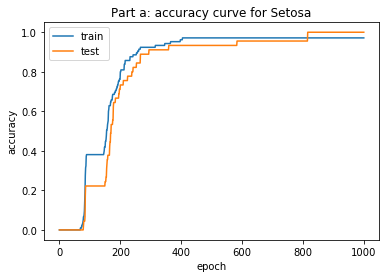

(45, 2)
[-1.59346985  1.11208706] [ 1.376105   -1.81690214]


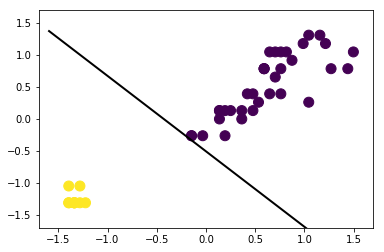

In [10]:
plt.plot(np.arange(NUM_ITER), train_accuracy)
plt.plot(np.arange(NUM_ITER), test_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.title('Part a: accuracy curve for Setosa')
plt.show()
x_test_values = x_test_1.values;
print(x_test_values.shape)
plot_x = np.array([np.min(x_test_values[:, 0] - 0.2), np.max(x_test_values[:, 1] - 0.2)])


plot_y = 1 / W_setosa[1] * (-W_setosa[0] * plot_x - b_setosa)
print(plot_x, plot_y)
plt.scatter(x_test_values[:, 0], x_test_values[:, 1], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-1.7, 1.7]); 
plt.ylim([-1.7, 1.7]);
plt.show()

<h1>Part b:</h1>

In [11]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [12]:
#define number of training iterations
NUM_ITER = 500
#define learning rate
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [13]:
# tf.reset_default_graph()

<h2>Define update rule and accuracy</h2>

In [ ]:
# Same as Part a. no change

<h2>Execute training</h2>

In [14]:
init = tf.global_variables_initializer()
test_accuracy = []
train_accuracy = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(NUM_ITER):
        #run optimization
        sess.run(optimizer, feed_dict={X:x_train_2.values, Y:y_train_2})

        acc_train = sess.run(accuracy,feed_dict={X:x_train_2.values, Y:y_train_2})
        acc_test =  sess.run(accuracy,feed_dict={X:x_test_2.values, Y:y_test_2})
        train_accuracy.append(acc_train)
        test_accuracy.append(acc_test)
        if i % 100 ==0:
            print("step "+str(i)+", Train Accuracy= {:.3f}".format(acc_train))
            print("step "+str(i)+", Test Accuracy= {:.3f}".format(acc_test))

    print("Training finished!")
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_train_2, Y:y_train_2}))
    W_viginia = np.squeeze(sess.run(W))
    b_viginia = np.squeeze(sess.run(b))

step 0, Train Accuracy= 0.638
step 0, Test Accuracy= 0.733
step 100, Train Accuracy= 0.638
step 100, Test Accuracy= 0.733
step 200, Train Accuracy= 0.667
step 200, Test Accuracy= 0.733
step 300, Train Accuracy= 0.686
step 300, Test Accuracy= 0.756
step 400, Train Accuracy= 0.705
step 400, Test Accuracy= 0.778
Training finished!
Testing ACcuracy: 0.7619048


<h2>Plot</h2>

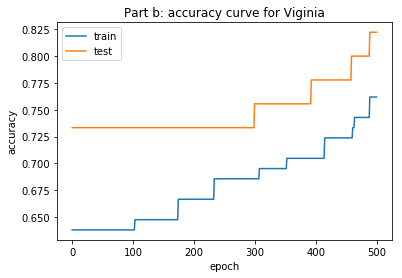

(45, 2)
[-1.59346985  1.11208706] [ 7.40149574 -3.88298282]


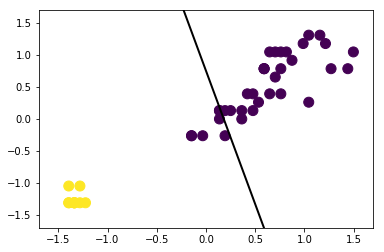

In [15]:
plt.plot(np.arange(NUM_ITER), train_accuracy)
plt.plot(np.arange(NUM_ITER), test_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.title('Part b: accuracy curve for Viginia')
plt.show()
x_test_values = x_test_1.values;
print(x_test_values.shape)
plot_x = np.array([np.min(x_test_values[:, 0] - 0.2), np.max(x_test_values[:, 1] - 0.2)])


plot_y = 1 / W_viginia[1] * (-W_viginia[0] * plot_x - b_viginia)
print(plot_x, plot_y)
plt.scatter(x_test_values[:, 0], x_test_values[:, 1], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-1.7, 1.7]); 
plt.ylim([-1.7, 1.7]);
plt.show()

<h1>Part c:</h1>

In [16]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [31]:
#learning rate
lr = 0.01
#number of traning steps
num_steps =1000
#number of batch_size
batch_size = 128

#network parameters
n_hidden_1 = 256
n_hidden_2 = 238
num_input_features = x_train_3.values.shape[1]
num_classes = 3

<h2>Define placehoder and variables</h2>

In [32]:
tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,num_input_features],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input_features, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}
#define a neural net model

<h2>Define the neural network</h2>

In [37]:
def iris_neural_net(x):
    layer_1_out = tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    layer_2_out = tf.nn.relu(tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']))
    out = tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [38]:
#predicted labels
logits = iris_neural_net(X)

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [41]:
train_accuracy, test_accuracy = [],[]
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #run optimization
        sess.run(train_op, feed_dict={X:x_train_3.values, Y:y_train_3})
       
        acc_train = sess.run(accuracy,feed_dict={X:x_train_3.values, Y:y_train_3.values})
        acc_test =  sess.run(accuracy,feed_dict={X:x_test_3.values, Y:y_test_3.values})
        train_accuracy.append(acc_train)
        test_accuracy.append(acc_test)
        if i % 100 ==0:
            print("step "+str(i)+", Train Accuracy= {:.3f}".format(acc_train))
            print("step "+str(i)+", Test Accuracy= {:.3f}".format(acc_test))

    print("Training finished!")
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_train_3, Y:y_train_3}))
    

step 0, Train Accuracy= 0.600
step 0, Test Accuracy= 0.622
step 100, Train Accuracy= 1.000
step 100, Test Accuracy= 0.911
step 200, Train Accuracy= 1.000
step 200, Test Accuracy= 0.911
step 300, Train Accuracy= 1.000
step 300, Test Accuracy= 0.911
step 400, Train Accuracy= 1.000
step 400, Test Accuracy= 0.911
step 500, Train Accuracy= 1.000
step 500, Test Accuracy= 0.911
step 600, Train Accuracy= 1.000
step 600, Test Accuracy= 0.911
step 700, Train Accuracy= 1.000
step 700, Test Accuracy= 0.911
step 800, Train Accuracy= 1.000
step 800, Test Accuracy= 0.911
step 900, Train Accuracy= 1.000
step 900, Test Accuracy= 0.911
Training finished!
Testing ACcuracy: 1.0


<h2>Plot</h2>

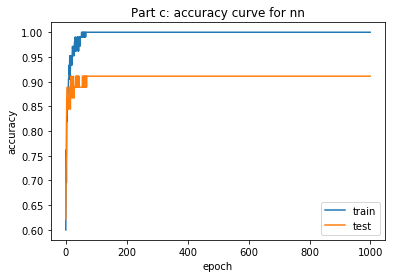

In [44]:
plt.plot(np.arange(num_steps), train_accuracy)
plt.plot(np.arange(num_steps), test_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.title('Part c: accuracy curve w/ nn with 2 hidden layer')
plt.show()